In [29]:
#!pip install statsmodels

In [66]:
#import modules
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [31]:
#Read data
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

In [32]:
#There are no null values
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [33]:
#describe the data
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [34]:
#duplicate
df.duplicated().sum()

0

# Visualization

<AxesSubplot:>

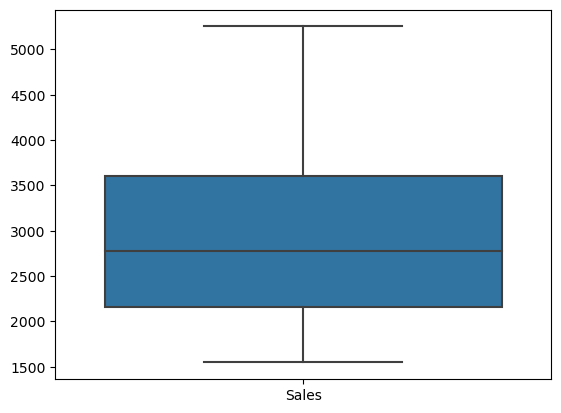

In [35]:
import seaborn as  sns
sns.boxplot(data =df)

<AxesSubplot:>

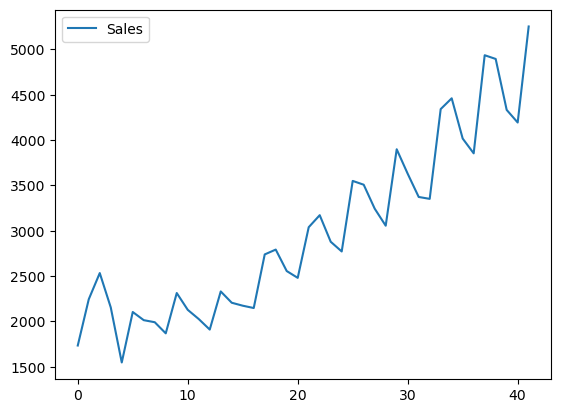

In [36]:
df.plot()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

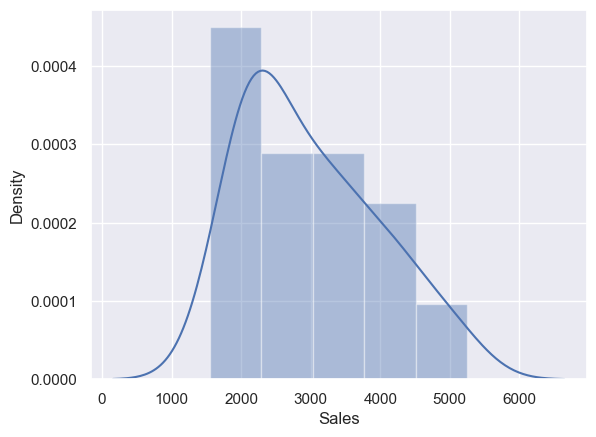

In [37]:
sns.set_theme()
sns.distplot(df['Sales'], kde=True)

Lag plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


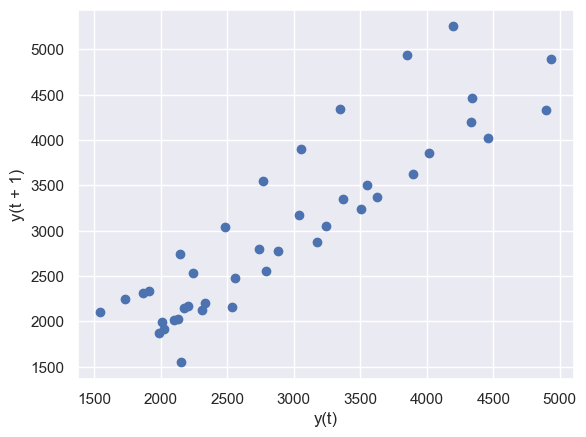

In [38]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(df['Sales'])
plt.show()

In [39]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

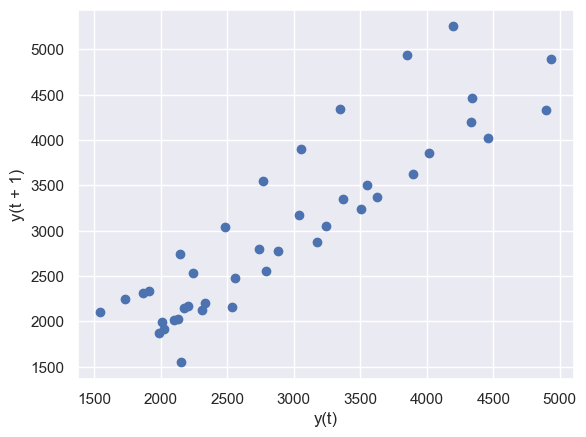

In [40]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

In [41]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [42]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis= 1)

In [43]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [44]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [45]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(df['Sales'])

In [46]:
train =cc.head(32)
test =cc.tail(10)

# Autocorrelation plot

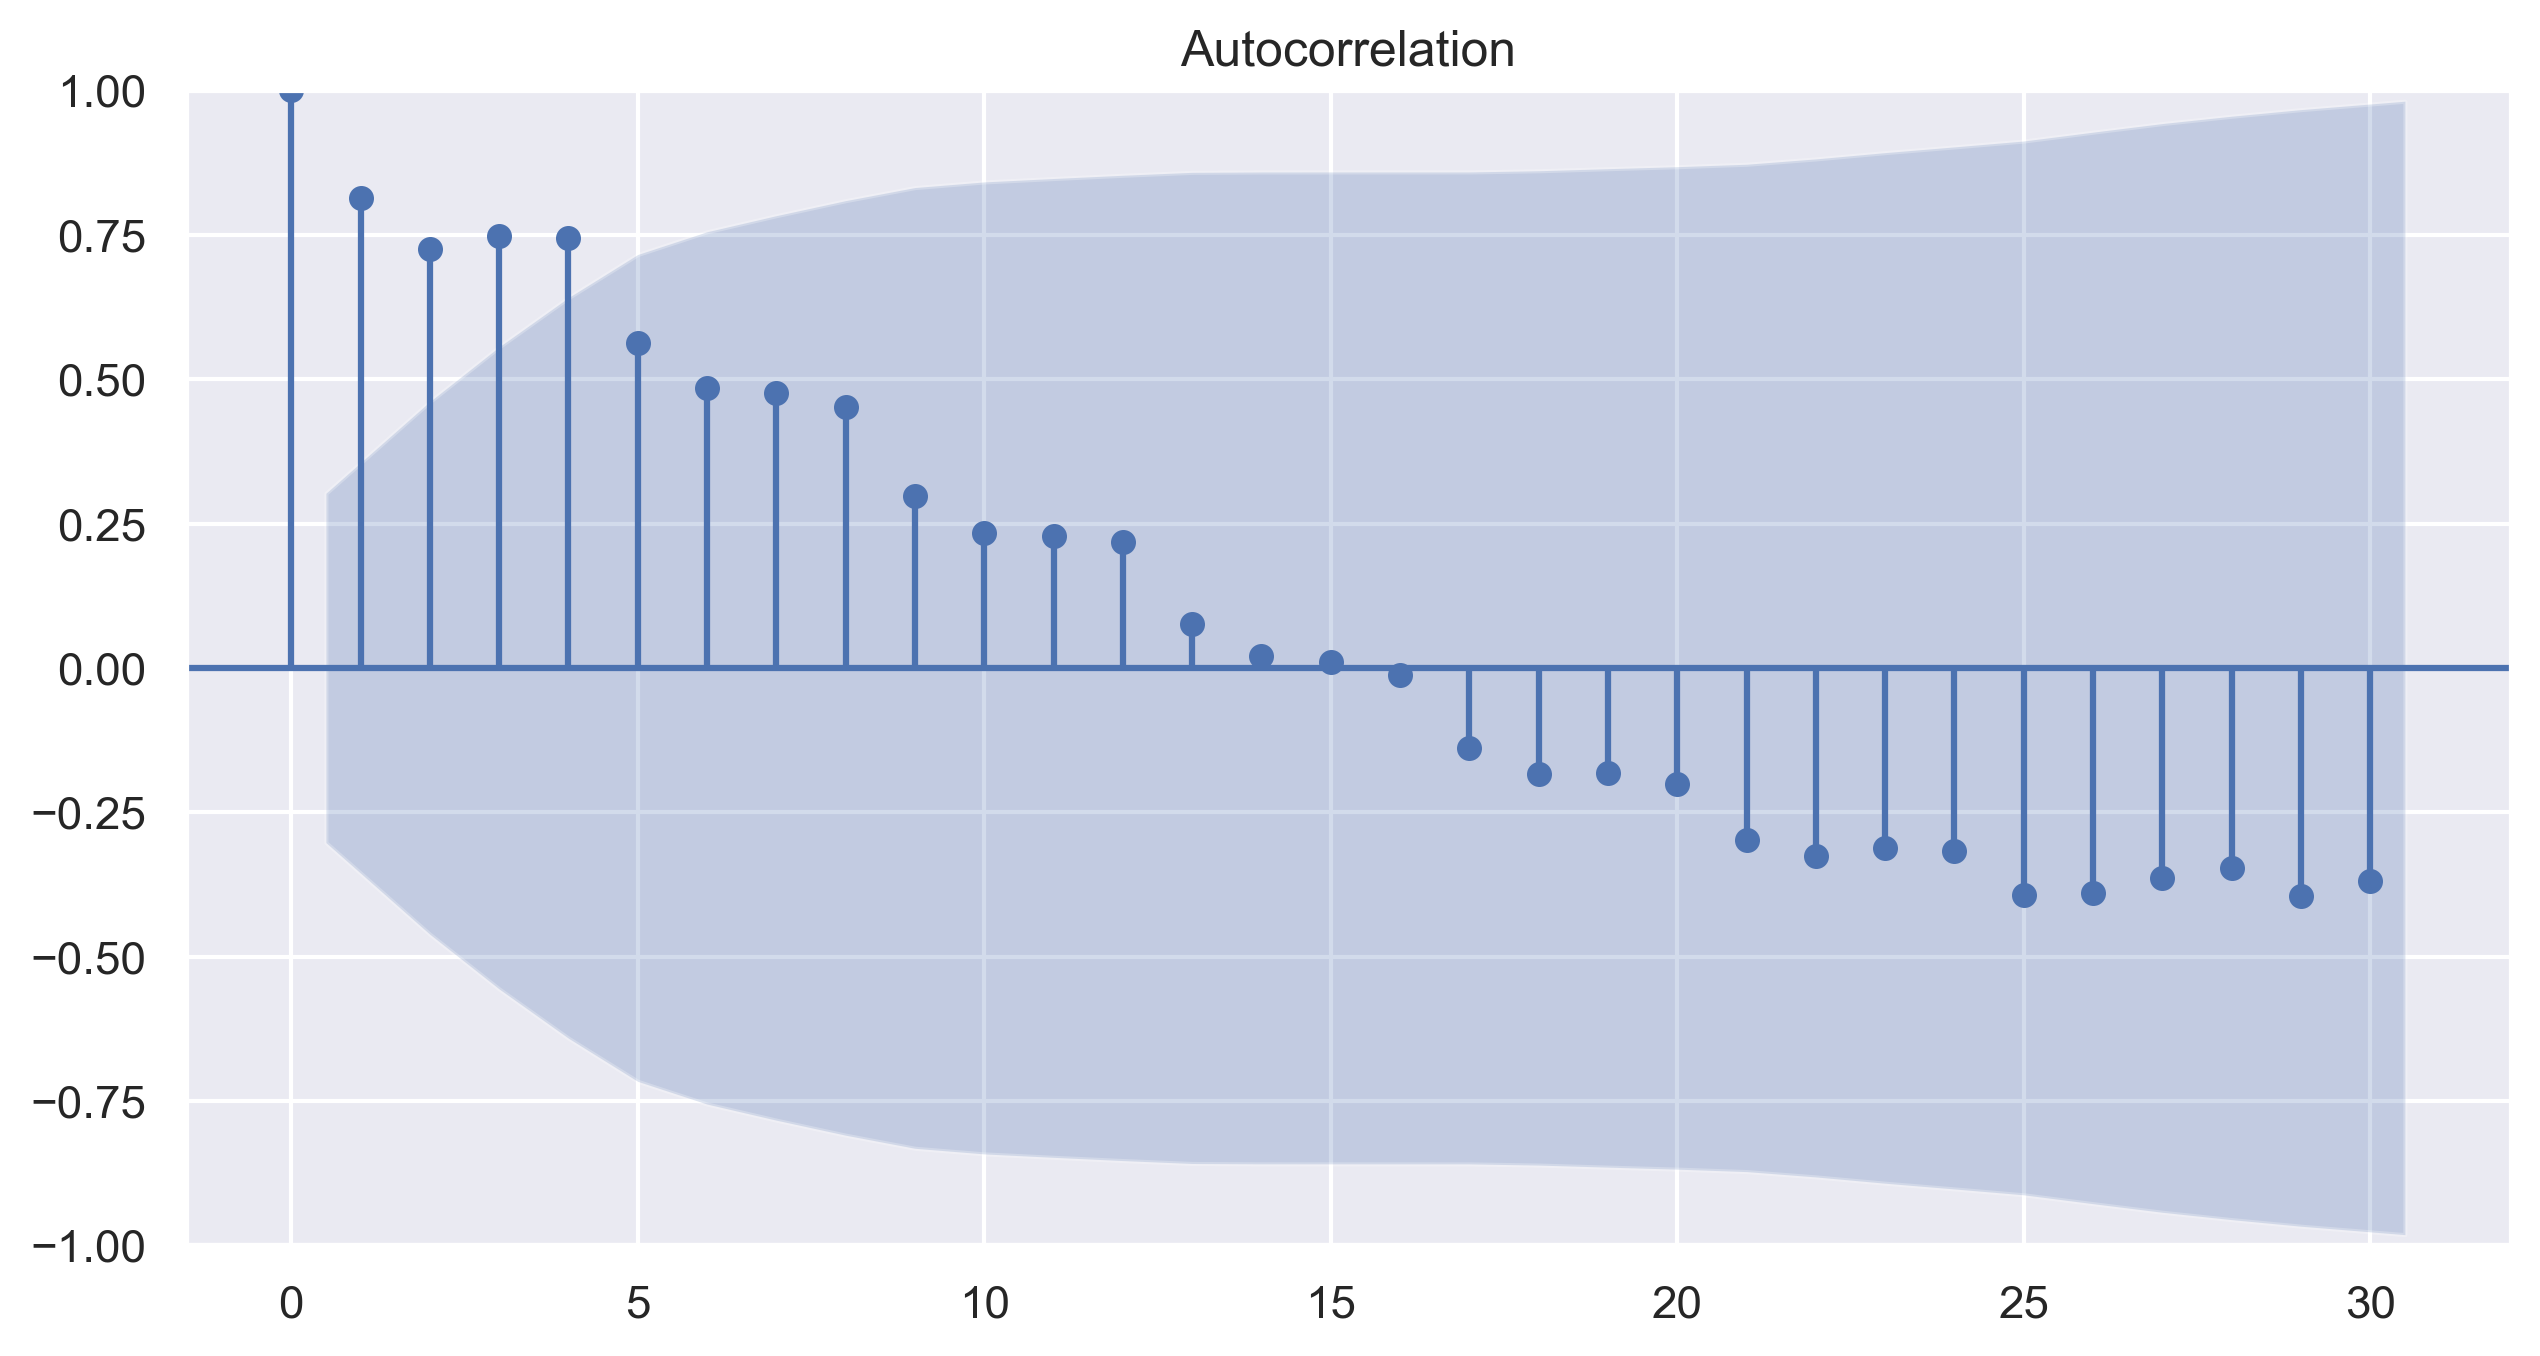

In [67]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Sales'], lags=30)
plt.show()

# RMSE value for each model

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767132

In [49]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [50]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407288

In [51]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


We can say that the best model is Additive Seasonality Quadratic model, it is showing the lowest RMSE value.

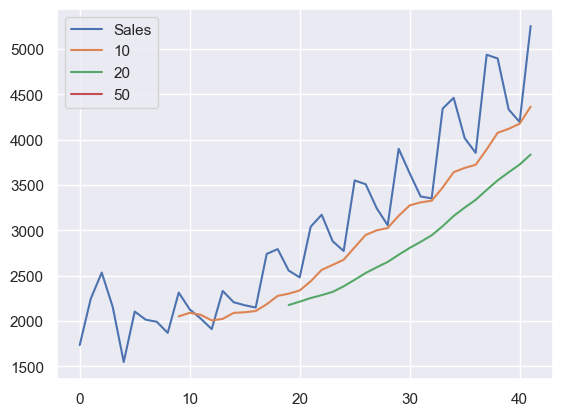

In [52]:
df['Sales'].plot()
df['Sales'].rolling(10).mean().plot(label = '10')
df['Sales'].rolling(20).mean().plot(label = '20')
df['Sales'].rolling(50).mean().plot(label = 50)
plt.legend()

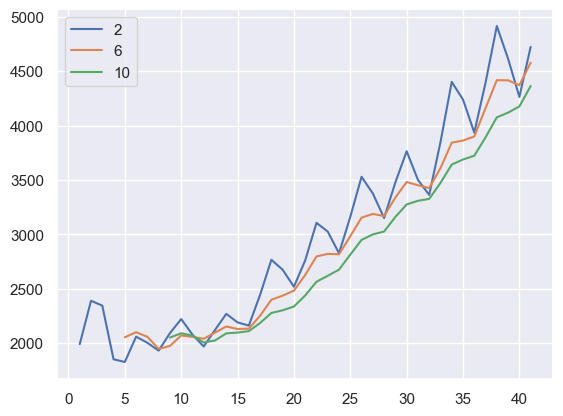

In [53]:
for i in range(2,12,4):
    df['Sales'].rolling(i).mean().plot(label = str(i))
    plt.legend()

Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

    If p< 0.05 ; Data is stationary

    if p>0.05; Data is not stationary

According the p-value, the dataset is stationary as the p value is less than alpha value.

# Arima model building:
    ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
    First, we need to find out the order of arima model.

In [54]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [55]:
order = auto_arima(df['Sales'])

In [56]:
order

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [57]:
df.shape

(42, 3)

In [58]:
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [59]:
train.shape

(12, 3)

In [60]:
test.shape

(30, 3)

In [61]:
#ARIMA model
model = ARIMA(train['Sales'], order=(1, 0, 5)).fit()

# Evaluating the model

In [62]:
test

,Quarter,Sales,quarter
12,Q1_89,1910.603996,Q1
13,Q2_89,2331.164993,Q2
14,Q3_89,2206.549995,Q3
15,Q4_89,2173.967995,Q4
16,Q1_90,2148.278000,Q1
17,Q2_90,2739.307999,Q2
18,Q3_90,2792.753998,Q3
19,Q4_90,2556.009995,Q4
20,Q1_91,2480.973999,Q1
21,Q2_91,3039.522995,Q2


In [63]:
ypred = model.predict(start =12, end = 41)
ypred

12    1934.029242
13    2005.451359
14    2064.416808
15    2038.471610
16    2061.764311
17    2017.302137
18    2059.270832
19    2019.655780
20    2057.049184
21    2021.752836
22    2055.069732
23    2023.621278
24    2053.306074
25    2025.286028
26    2051.734685
27    2026.769293
28    2050.334603
29    2028.090857
30    2049.087153
31    2029.268348
32    2047.975697
33    2030.317473
34    2046.985408
35    2031.252226
36    2046.103077
37    2032.085075
38    2045.316934
39    2032.827130
40    2044.616495
41    2033.488288
Name: predicted_mean, dtype: float64

In [64]:
print(np.sqrt(mean_squared_error(test['Sales'], ypred)))

1600.668646703306
